In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytensor.tensor as T
import nutpie


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def ddiffusion(rt,theta,delta,mu):
    #RT : reaction time
    #theta: threshold
    #mu: drift rate
    #delta: non-decision time
    first= 1/np.sqrt(2*np.pi)*(2*theta+mu*(rt-delta))
    second = (2*(rt-delta)**1.5)
    third = np.exp(-(2*theta-mu*(rt-delta))**2/(2*(rt-delta)))
    return first/second*third
def ddiffusion2(rt,theta,delta,mu):
    first_num = 1/np.sqrt(2*np.pi)*(2*theta+mu*(rt-delta))
    first_denum = 2*((rt-delta)**1.5)
    first_term = first_num/first_denum

    sec_num = -(2*theta-mu*(rt-delta))**2
    sec_denum = 2*(rt-delta)
    sec_term = np.exp(sec_num/sec_denum)
    return first_term*sec_term
def logdiffusion(rt,theta,delta,mu):
    first= np.log((2*theta+mu*(rt-delta))/(2*(rt-delta)**1.5)) 
    second = np.log(np.sqrt(2*np.pi)) 
    third= (2*theta-mu*(rt-delta))**2/(2*(rt-delta))
    return first-second-third
def rng_diffusion(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = np.searchsorted(cdf,randi)
    return X[idx]

def rng_diffusion2(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion2(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = np.searchsorted(cdf,randi)
    return X[idx]

In [3]:

def ddiffusion2_T(rt,theta,delta,mu):
    first_num = 1/T.sqrt(2*T.pi)*(2*theta+mu*(rt-delta))
    first_denum = 2*T.power((rt-delta),1.5)
    first_term = first_num/first_denum

    sec_num = -T.power((2*theta-mu*(rt-delta)),1.5)
    sec_denum = 2*(rt-delta)
    sec_term = T.exp(sec_num/sec_denum)
    return first_term*sec_term
def logdiffusion_T(rt,theta,delta,mu):
    first= T.log((2*theta+mu*(rt-delta))/(2*T.power((rt-delta),1.5))) 
    second = T.log(T.sqrt(2*T.pi)) 
    third= (2*theta-mu*(rt-delta))**2/(2*(rt-delta))
    return first-second-third
def rng_diffusion_T(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = T.searchsorted(cdf,randi)
    return X[idx]

def rng_diffusion2_T(theta,delta,mu,size):
    X = np.linspace(0,3,48000)
    dx =  X[1]-X[0]
    pdist = ddiffusion2(X,theta,delta,mu)
    cdf = np.nancumsum(pdist)*dx
    cdf = cdf/cdf.max()
    randi = np.random.random_sample(size=size)
    idx = T.searchsorted(cdf,randi)
    return X[idx]

In [ ]:
a = np.linspace(0.01,10,10000)
sim_vals = list()
sim_vals2 = list()
log_sim = list()
log_sim_2 = list()
rng_list = list()
rng_list2 = list()

theta = 1.2 # boundary
delta=0.1 #ndt
mu=1.5 #drift
for i in a:
    sim_vals.append(ddiffusion(i,theta,delta,mu))
    sim_vals2.append(ddiffusion2(i,theta,delta,mu))
    log_sim.append(logdiffusion(i,theta,delta,mu))
    log_sim_2.append(np.log(ddiffusion2(i,theta,delta,mu)))
rng_list.append(rng_diffusion(theta,delta,mu,10000))
rng_list2.append(rng_diffusion2(theta,delta,mu,10000))

plt.plot(a,sim_vals)
plt.plot(a,sim_vals2)

#plt.xlim([0,800])

#plt.plot(a,cdf)
#plt.hist(rng_list)
plt.figure()

sns.kdeplot(rng_list[0],color='k')
sns.kdeplot(rng_list2[0],color='yellow')
plt.xlim([0,10])
plt.figure()
plt.plot(a,np.nanlog(log_sim))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('rt')
ax1.set_ylabel('prob', color=color)
ax1.plot(a, sim_vals, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,0.004])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.hist(np.array(rng_list[0]),bins=100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('rt')
ax1.set_ylabel('prob', color=color)
ax1.plot(a, sim_vals2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,0.01])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.hist(np.array(rng_list[0]),bins=100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [9]:
import pytensor.tensor as T


In [10]:
import pandas as pd
df = pd.read_csv("PipPopRobotsDF.csv")
df.groupby(["Cue"]).mean(["RT"]).reset_index()
df

,Unnamed: 0,Correct,RT,ID,Cue
0,0,True,1.296043,0,0
1,1,True,1.004838,0,0
2,2,True,0.994750,0,2
3,3,True,0.994516,0,1
4,4,True,1.005114,0,3
...,...,...,...,...,...
736,736,True,0.524834,18,3
737,737,True,0.616462,18,1
738,738,True,2.341574,18,2
739,739,True,4.015726,18,0


from itertools import product

subj = pd.factorize(df.ID)[1]
cue = pd.factorize(df.Cue)[1]
cue=np.sort(cue)
rts_nc = np.full((len(subj),10),np.nan)
rts_ac = np.full((len(subj),10),np.nan)
rts_hc = np.full((len(subj),10),np.nan)
rts_mc = np.full((len(subj),10),np.nan)

for iSub in subj: 
    for iCue in cue:
        tmp_df = df[(df.ID==iSub) & (df.Cue==iCue)]
        sz = len(tmp_df.RT)
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_ac[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
        if iCue==0:
            rts_nc[iSub,:sz] = tmp_df.RT
nSubj,nCue,nStim = full_rts.shape
subjIdx, cueIdx, stimIdx = zip(*product(range(nSubj), range(nCue), range(nStim)))
rts_flat = full_rts.flatten()

In [160]:
from itertools import product

subj = pd.factorize(df.ID)[1]
cue = pd.factorize(df.Cue)[1]
cue=np.sort(cue)
#subj=[0,1,2]
full_rts = np.full((len(subj),len(cue),10),np.nan)
mean_rts = np.full((len(subj),len(cue)),np.nan)
min_rts = np.full((len(subj),len(cue)),np.nan)



for iSub in subj: 
    for iCue in cue:
        tmp_df = df[(df.ID==iSub) & (df.Cue==iCue)]
        sub_df = df[(df.ID==iSub)]
        sz = len(tmp_df.RT)
        full_rts[iSub,iCue,:sz] = tmp_df.RT
        mean_rts[iSub,iCue] = np.mean(tmp_df.RT)
        min_rts[iSub,iCue] = np.min(sub_df.RT)-0.01
        if sz <10:
            mean_rt = np.mean(tmp_df.RT)
            full_rts[iSub,iCue,sz:] = mean_rt
            
        
nSubj,nCue = mean_rts.shape
subjIdx, cueIdx,stimIdx = zip(*product(range(nSubj), range(nCue),range(10)))
subjIdx = np.array(subjIdx)
cueIdx = np.array(cueIdx)

rts_flat = full_rts.flatten()


In [163]:
dat = {'RT':rts_flat,'subjIdx':subjIdx,'cueIdx':cueIdx,'stimIdx':stimIdx}
data_df = pd.DataFrame(dat)


In [164]:
import pymc as pm
from pytensor.tensor import TensorVariable
from typing import Optional, Tuple
def Phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x / pm.math.sqrt(2))
def logp(rt: TensorVariable, theta: TensorVariable, delta: TensorVariable, mu: TensorVariable) -> TensorVariable:
    return logdiffusion_T(rt,theta,delta,mu)
def random(theta: np.ndarray | float, delta: np.ndarray | float,mu: np.ndarray | float,rng: Optional[np.random.Generator] = None,size : Optional[Tuple[int]]=None) -> np.ndarray | float :
    return rng_diffusion2_T(theta,delta,mu,size)
        

In [165]:
coords = {"subj":subj , "cue":cue,"stim":np.arange(10),"obs_id":np.arange(len(rts_flat))}
coords

{'subj': Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64'),
 'cue': array([0, 1, 2, 3], dtype=int64),
 'stim': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142

C:\Users\Bora Celebi\AppData\Local\Temp\ipykernel_23368\450900282.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(draws,bins=100)
C:\Users\Bora Celebi\AppData\Local\Temp\ipykernel_23368\450900282.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(draws,bins=100)
C:\Users\Bora Celebi\AppData

<Axes: ylabel='Density'>

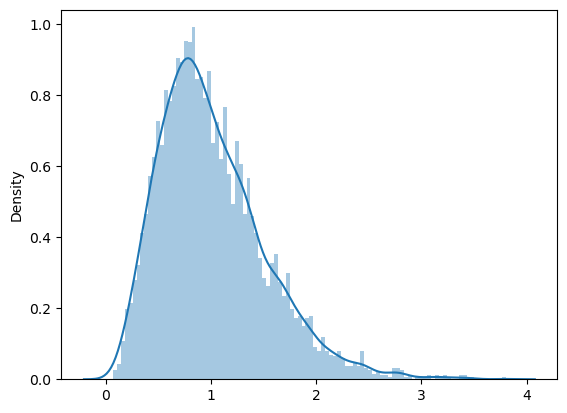

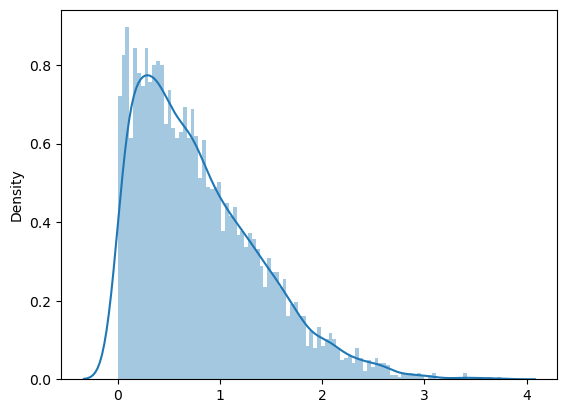

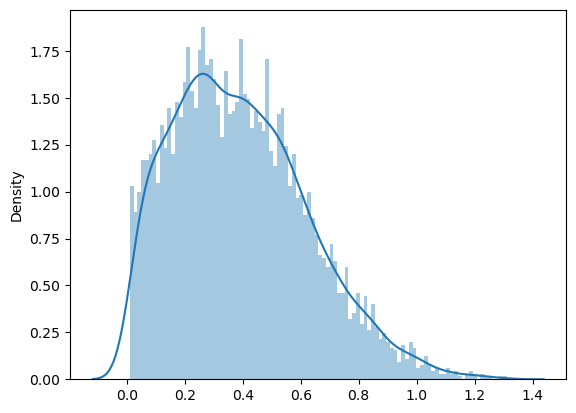

In [166]:
v = pm.Gamma.dist(mu=1,sigma=0.5)
draws = pm.draw(v,5000)
sns.distplot(draws,bins=100)
v = pm.HalfNormal.dist(sigma=1)
draws = pm.draw(v,5000)
plt.figure()
sns.distplot(draws,bins=100)
v = pm.TruncatedNormal.dist(mu=0.3,sigma=0.3,lower=0.01)
draws = pm.draw(v,5000)
plt.figure()
sns.distplot(draws,bins=100)
#plt.xlim([0,50])

In [167]:
minRT = np.min(rts_flat)
RTbound = 0.1
RTbound = np.full((nSubj,),0.1)

C:\Users\Bora Celebi\AppData\Local\Temp\ipykernel_23368\628326188.py:20: RuntimeWarning: invalid value encountered in scalar power
  first= np.log((2*theta+mu*(rt-delta))/(2*(rt-delta)**1.5))


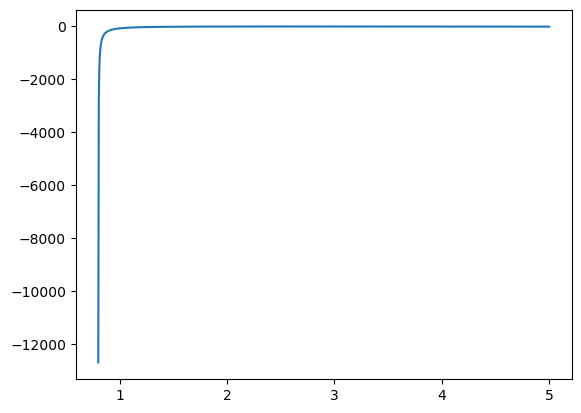

In [168]:
a = np.linspace(0.1,5,1000)
b=list()
for i in range(len(a)):
    b.append(logdiffusion(a[i],3.01,0.79997875,3.01))
plt.plot(a,b)

In [172]:
min_rts = np.mean(min_rts,axis=1)
RTbound = np.full((nSubj,),0.1)

In [173]:
theta = 10
delta=0.2
mu=0.4
#x = rng_diffusion(theta,delta,mu,760)
#x[5]=np.nan
with pm.Model(coords=coords) as model:
    #data =pm.ConstantData("wiener_data",data_df,dims=("subj","cue","stim"))
    mu_v = pm.TruncatedNormal(name="mu_drift",mu=1,sigma=3,lower=0.01,dims="cue")
    sigma_v = pm.HalfNormal(name="sigma_drift",sigma=1,dims="cue")
    mu_a = pm.TruncatedNormal(name="mu_bound",mu=1,sigma=3,lower=0.01,dims="cue")
    sigma_a = pm.HalfNormal(name="sigma_bound",sigma=1,dims="cue")
    mu_t = pm.TruncatedNormal(name="mu_t",mu=0.3,sigma=0.3,lower=0.01)
    sigma_t = pm.HalfNormal(name="sigma_ndt",sigma=1)

    
    #v_offset = pm.HalfNormal('drift_offset',sigma= 1,dims=["subj","cue"])
    v_offset = pm.Normal('drift_offset',mu=0,sigma= 1,dims=["subj","cue"])
    v = pm.Deterministic('drift', mu_v + sigma_v*v_offset)
    #a_offset = pm.HalfNormal('bound_offset',sigma= 1,dims=["subj","cue"])
    a_offset = pm.Normal('bound_offset',mu=0,sigma= 1,dims=["subj","cue"])
    a = pm.Deterministic('bound', mu_a + sigma_a*a_offset)
    #t_offset = pm.HalfNormal('ndt_offset',sigma= 1,dims=["subj","cue"])
    t_offset = pm.Normal('ndt_offset',mu=0,sigma= 1,dims=["subj"])
    t = pm.Deterministic("ndt", Phi(mu_t + sigma_t*t_offset)*(min_rts-RTbound)+RTbound)
    # v = pm.TruncatedNormal('drift',mu=mu_v,sigma= sigma_v,lower=0.01,dims=["subj","cue"])
    # a = pm.TruncatedNormal('bound',mu=mu_a,sigma= sigma_a,lower=0.01,dims=["subj","cue"])
    # t = pm.TruncatedNormal('ndt',mu=mu_t,sigma= sigma_t,lower=0.1,upper=minRT,dims=["subj","cue"])
    
    
    pm.CustomDist("wiener", a[subjIdx,cueIdx],t[subjIdx],v[subjIdx,cueIdx], \
                  logp=logp, \
                  random=random,\
                  observed=rts_flat
                  
                 )
    results = pm.sample(10000,tune=2000,chains=4,cores=4, target_accept=0.99, initvals={'mu_drift':np.full((nCue),2), 
    
                                                                 'mu_bound':np.full((nCue),1),

                                                                 'mu_t':0.2})




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_drift, sigma_drift, mu_bound, sigma_bound, mu_t, sigma_ndt, drift_offset, bound_offset, ndt_offset]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 1239 seconds.
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.


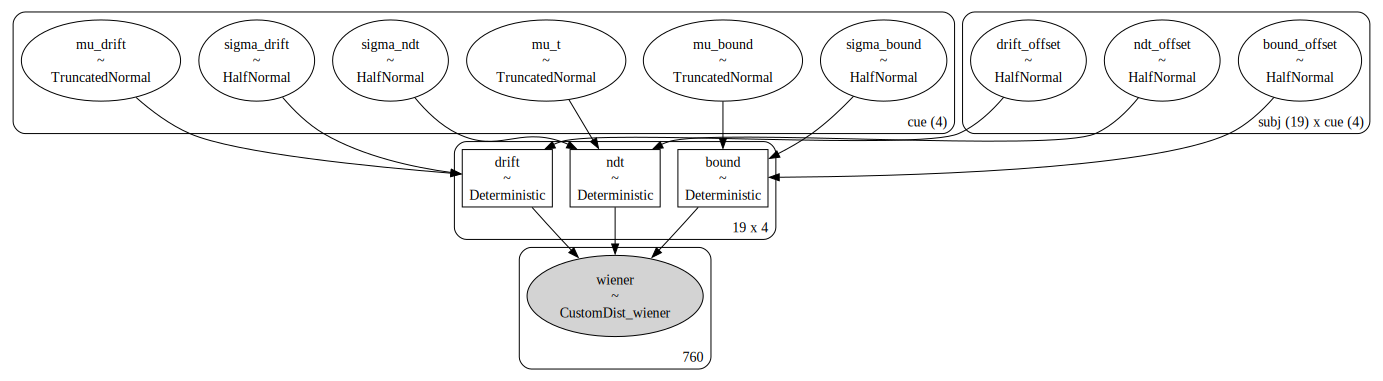

In [65]:
pm.model_to_graphviz(model)

In [180]:
with model:
    pm.compute_log_likelihood(results)

In [181]:
results.to_netcdf("WienerVA_HierNAT.nc")

'WienerVA_HierNAT.nc'

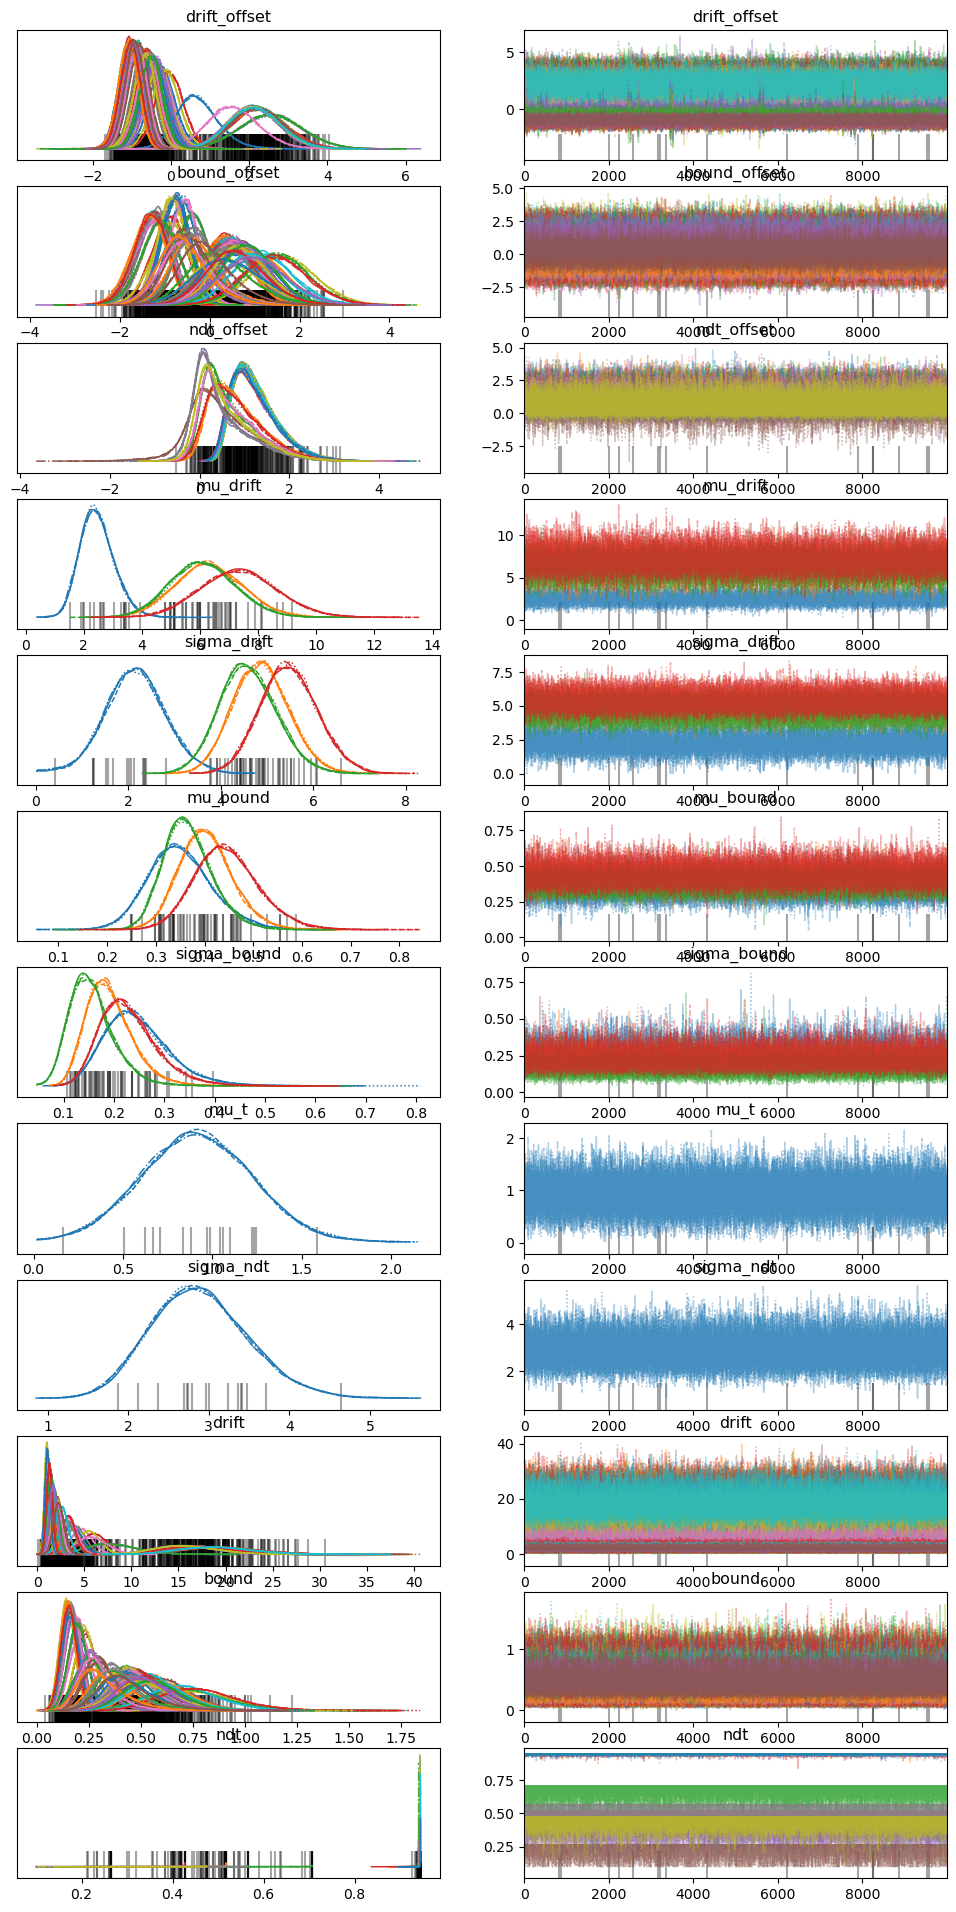

In [149]:
import arviz as az
az.plot_trace(results);


In [150]:
summary=az.summary(results)
pd.set_option('display.max_rows', 500)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"drift_offset[0, 0]",-0.222,0.360,-0.879,0.457,0.003,0.002,16990.0,15029.0,1.0
"drift_offset[0, 1]",2.227,0.671,0.970,3.481,0.003,0.002,63693.0,29337.0,1.0
"drift_offset[0, 2]",2.121,0.645,0.961,3.357,0.003,0.002,60255.0,31472.0,1.0
"drift_offset[0, 3]",2.142,0.657,0.922,3.391,0.003,0.002,56752.0,28344.0,1.0
"drift_offset[1, 0]",-0.380,0.341,-1.032,0.229,0.003,0.002,16449.0,17768.0,1.0
"drift_offset[1, 1]",-0.937,0.262,-1.433,-0.452,0.003,0.002,10384.0,17560.0,1.0
"drift_offset[1, 2]",-0.296,0.332,-0.905,0.339,0.003,0.002,16796.0,25547.0,1.0
"drift_offset[1, 3]",-0.727,0.278,-1.258,-0.213,0.003,0.002,10680.0,19968.0,1.0
"drift_offset[2, 0]",-0.618,0.317,-1.213,-0.033,0.003,0.002,14649.0,17463.0,1.0
"drift_offset[2, 1]",2.155,0.653,0.907,3.354,0.003,0.002,57703.0,30868.0,1.0


In [70]:
results

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [41]:
np.sum(summary.r_hat>1.0)

252

In [62]:
rts_flat_1 = rts_flat[subjIdx==0]
cue_1 = cueIdx[(subjIdx==0)]
rts_flat_1
coords_1 = {'cue':[0,1,2,3]}

In [26]:
results.posterior

<xarray.Dataset>
Dimensions:       (chain: 4, draw: 1000, cue: 4, subj: 19, drift_dim_0: 19,
                   drift_dim_1: 4, bound_dim_0: 19, bound_dim_1: 4,
                   ndt_dim_0: 19, ndt_dim_1: 4)
Coordinates:
  * chain         (chain) int32 0 1 2 3
  * draw          (draw) int32 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * cue           (cue) int64 0 1 2 3
  * subj          (subj) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
  * drift_dim_0   (drift_dim_0) int32 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
  * drift_dim_1   (drift_dim_1) int32 0 1 2 3
  * bound_dim_0   (bound_dim_0) int32 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
  * bound_dim_1   (bound_dim_1) int32 0 1 2 3
  * ndt_dim_0     (ndt_dim_0) int32 0 1 2 3 4 5 6 7 ... 11 12 13 14 15 16 17 18
  * ndt_dim_1     (ndt_dim_1) int32 0 1 2 3
Data variables:
    mu_drift      (chain, draw, cue) float64 0.697 0.9101 0.4547 ... 0.593 1.058
    sigma_drift   (chain, draw, cue) float64 0.9268 3.112 1.822 ... 0.6679 1.194
    mu_bound      (chain, draw, cue) float64 2.252 1.342 1.278 ... 0.6859 0.6372
    sigma_bound   (chain, draw, cue) float64 2.875 1.312 1.499 ... 0.8072 1.009
    mu_t          (chain, draw, cue) float64 0.1022 0.08821 ... 0.1627 0.09864
    sigma_ndt     (chain, draw, cue) float64 1.378 1.214 2.229 ... 1.999 3.344
    drift_offset  (chain, draw, subj, cue) float64 2.684 6.244 ... 1.212 2.11
    bound_offset  (chain, draw, subj, cue) float64 6.543 6.655 ... 3.814 2.171
    ndt_offset    (chain, draw, subj, cue) float64 2.764 2.144 ... 1.172 1.778
    drift         (chain, draw, drift_dim_0, drift_dim_1) float64 24.15 ... 3...
    bound         (chain, draw, bound_dim_0, bound_dim_1) float64 1.405e+09 ....
    ndt           (chain, draw, ndt_dim_0, ndt_dim_1) float64 0.3152 ... 0.3152
Attributes:
    created_at:                 2023-12-14T10:31:21.047019
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.9.2
    sampling_time:              6423.263575792313
    tuning_steps:               300

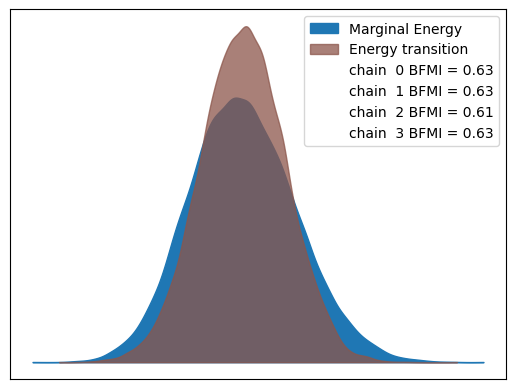

In [151]:
az.plot_energy(results);

In [114]:
coords

{'subj': Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64'),
 'cue': array([0, 1, 2, 3], dtype=int64)}

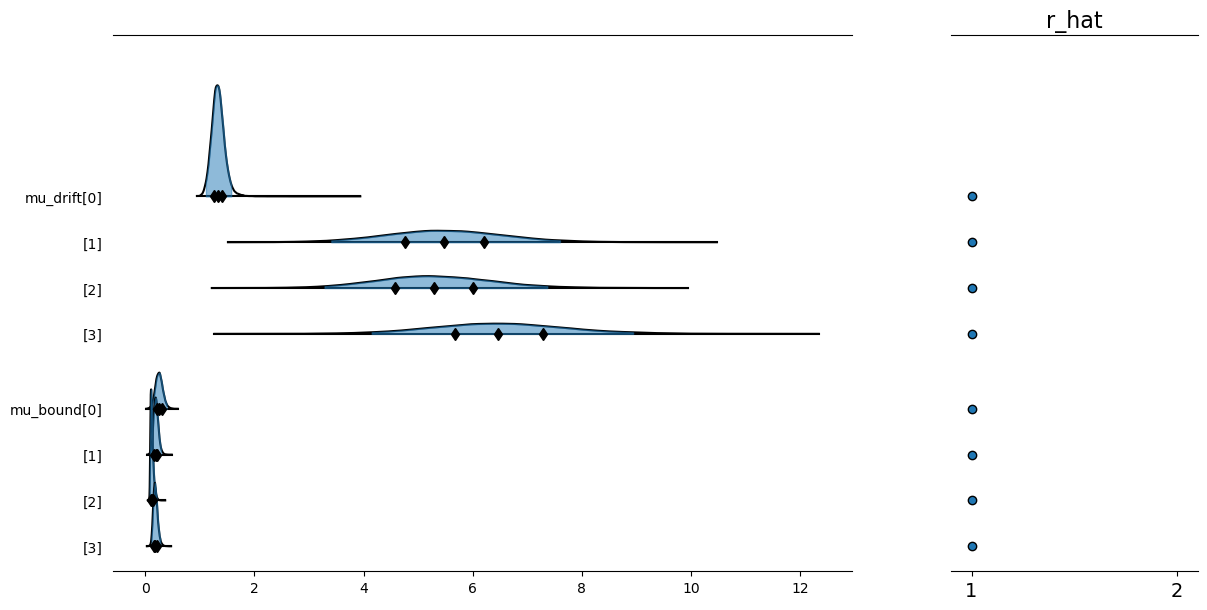

In [179]:
coords = {"subj":subj , "cue":cue}

#labeller = azl.MapLabeller(var_name_map={"theta": r"$\theta$"})
az.plot_forest(results, combined=True, hdi_prob=0.95, r_hat=True,var_names=["mu_drift","mu_bound"],
              kind='ridgeplot',ridgeplot_quantiles=[.25, .5, .75],ridgeplot_truncate=False,
              ridgeplot_alpha=0.5,coords=coords);

In [174]:
bound=results.posterior['mu_bound']
bound = np.array(bound).reshape((40000,4))
drift=results.posterior['mu_drift']
drift = np.array(drift).reshape((40000,4))

<ErrorbarContainer object of 3 artists>

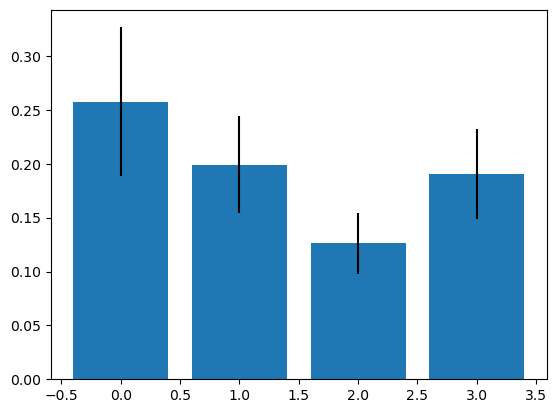

In [175]:
from scipy.stats import sem
means= [np.mean(bound[:,0]),np.mean(bound[:,1]),np.mean(bound[:,2]),np.mean(bound[:,3])]
sems =[np.std(bound[:,0]),np.std(bound[:,1]),np.std(bound[:,2]),np.std(bound[:,3])]
plt.bar([0,1,2,3],means)
plt.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')

<ErrorbarContainer object of 3 artists>

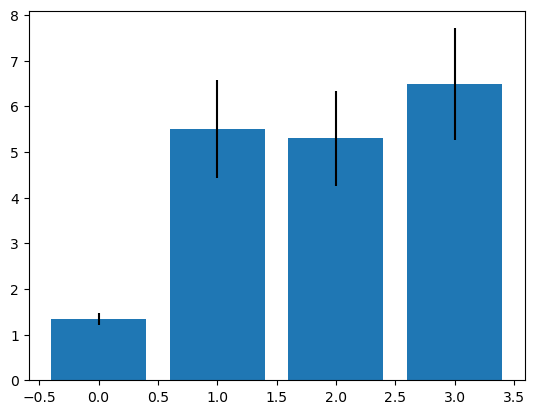

In [176]:
from scipy.stats import sem
means= [np.mean(drift[:,0]),np.mean(drift[:,1]),np.mean(drift[:,2]),np.mean(drift[:,3])]
sems =[np.std(drift[:,0]),np.std(drift[:,1]),np.std(drift[:,2]),np.std(drift[:,3])]
plt.bar([0,1,2,3],means)
plt.errorbar([0,1,2,3],means,yerr=sems,color='k',fmt='None')

In [177]:
print(np.sum(bound[:,0] < bound[:,1])/40000)
print(np.sum(bound[:,0] < bound[:,2])/40000)
print(np.sum(bound[:,0] < bound[:,3])/40000)

0.2339
0.0331
0.193775


In [178]:
print(np.sum(drift[:,0] < drift[:,1])/40000)
print(np.sum(drift[:,0] < drift[:,2])/40000)
print(np.sum(drift[:,0] < drift[:,3])/40000)

1.0
0.99995
1.0
